# What to plant for the dogging experiments in August 2019?

Does it matter if plants grow outside or in the greenhouse? If so, which life history stages are important? We hypothesise that reproduction is most important, since this is when TEs start becoming expressed, or at germination. To do this we allow plants to go through at least one generation outdoors and observe the effects on the offspring. We would use a site in northern Sweden that Svante will locate for us, because this can be run in parallel with Pieter's experiment.

There are two parts to this...

### Natural accessions

The main experimental design is to let natural accessions from Northern Sweden go through a whole generation outdoors in year 1, resow the offspring at the same site and at GMI in year 2, and then sequence these offspring. In year 2, we would also sow seeds harvested in the growth room outdoors, as well as seeds both harvested and then germinated (on agar) in the growth room. These comparisons allow you to distinguish the effects of:

* being outside at all
* reproducing outside
* germinating outside


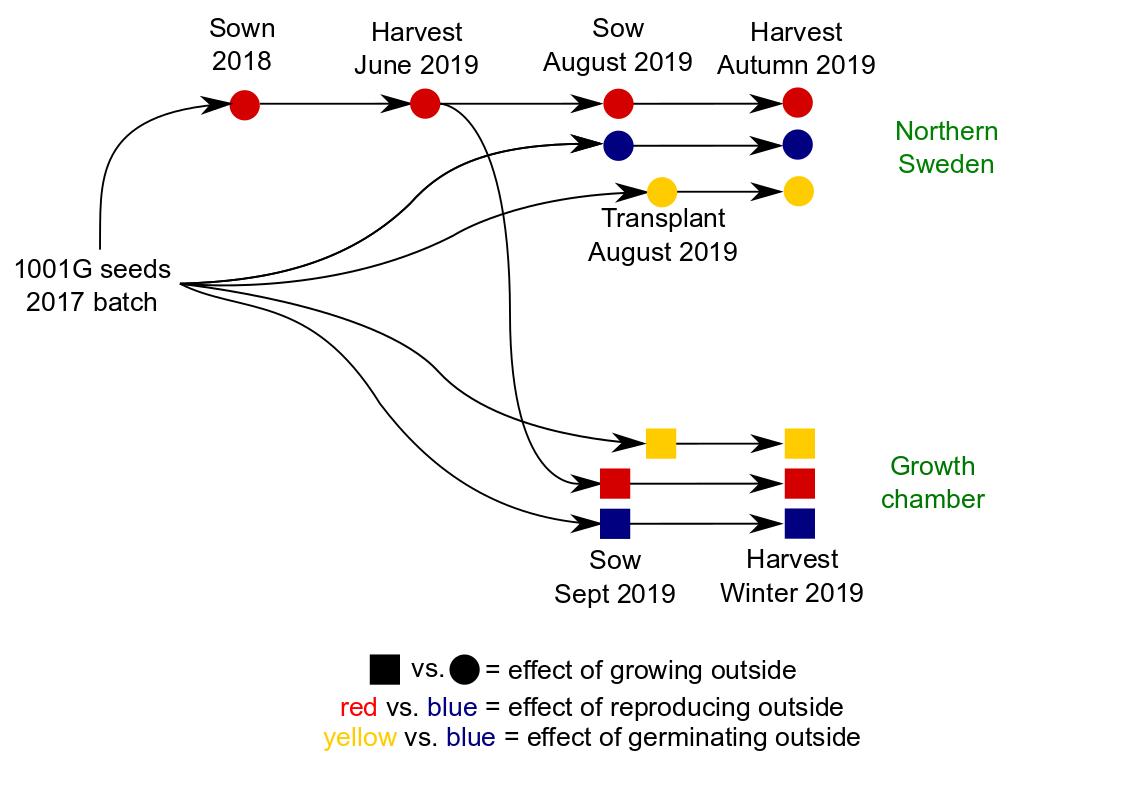

In [5]:
from IPython.display import Image
Image(filename='../figures/experimental_design_NSweden.png') 

### **Proper sex outdoors**

Assuming we find something, we would like to add to this somehow, but in order to do that we would need to set this up in 2019, so they had time to do a generation outside before 2020. Selfing is not the same as outcrossing, so we can set up some kind of parallel experiment to the pedigree we are running in the growth rooms. Assuming its too difficult (also, too time consuming) to cross parental accessions in the field, we can instead sow F<sub>1</sub>s generated in the growth room in 2019, and resow the resulting F<sub>2</sub> seed.

## Accessions from the 1001G

### Experimental setup

The figure above indicates the general set up.

I suggest ten accessions just because this simplifies randomisation in 6x11 trays (with ten plants and one blank well per block). To ensure sufficient seed to sow for year 2, I suggest using 9 such trays, hence 6x9=54 plants per accession and 504 plants in total.

In year 2, there are 3 germination treatments (grown outside, grown at GMI, transplanted), so we could keep 9 trays and have two plants per accession per treatment per tray, or 18 plants per accession per treatment overall. This allows for mortality, and we wouldn't have to sequence them all. Assuming we did 3 plants per treatment per accession, that would require sequencing 3x3x11=99 plants.

So, we need to pick 10 accessions.

In [6]:
import numpy as np
import pandas as pd

# Import data on TE number
te_counts = pd.read_csv("../data_raw/201809_TECNmergedrefined_0.2NA_lncov_rmdup_allreads.csv")
# Import GPS and flowering time information
gps = pd.read_csv("../data_raw/ft1001.csv")

The following are a set of candidate accessions that are on the PacBio list, ATAC seq list, and/or are involved in the crosses either Rahul or I are working on. See [here](https://docs.google.com/spreadsheets/d/18BLDGvkysiLs5m05J3rBWAhyaC-7dJQ8ca2iMfi-G5A/edit#gid=0).

In [7]:
candidates  = np.array([1254,
6969,
6184,
6069,
9332,
6017,
6244,
8227,
6180,
6231,
6237,
9433,
6046,
6191,
9452,
5856,
9412,
8249,
9412])

Pull out those accessions with half-way sensible flowering times at 16°C, that are from Northern Sweden.

In [8]:
cdat = gps[(gps['id'].isin(candidates)) &
    (gps['FT16'] > 80) & 
    (gps['FT16'] < 120) &
           (gps['latitude'] > 60)
   ].reset_index(drop=True)



cdat['n_TEs'] = te_counts['Estimated TE number'][te_counts['accession'].isin(cdat['id'])].reset_index(drop=True)
cdat

,id,name,country,latitude,longitude,FT10,FT16,n_TEs
0,6017,Eds-9,SWE,62.9000,18.4000,96.500000,104.000000,15299.59636
1,6046,L�_v-5,SWE,62.8010,18.0790,117.250000,117.000000,14332.28218
2,6184,TB�_ 01,SWE,62.8892,18.4522,93.666667,103.666667,16102.35961
3,6237,TOM 03,SWE,62.9619,18.3500,106.000000,109.000000,16784.03382
4,6244,TR� 01,SWE,62.9169,18.4728,90.750000,108.250000,14905.76639


There are five of them. Perhaps we can fill in another five from Southern Sweden that are available in crosses.

## F1s and their parents

Mayela is working on a series of crosses focussing on accessions with high and low TE counts. These are listed [here](https://docs.google.com/spreadsheets/d/18BLDGvkysiLs5m05J3rBWAhyaC-7dJQ8ca2iMfi-G5A/edit#gid=0). Unfortunately there wasn't a quartet of two high- and two low-TE-count accessions with the full set of reciprocal crosses, so for the pedigree we had to make new ones (namely: 6184, 6092, 8231 and 8249).

Once you remove 8386 (which is from Austria and has really short flowering time) and 9412 (from Sweden, but also with short flowerig time), you're left with 5 candidates, which is handy. They even have fairly consistnt flowering times.

In [9]:
f1_candidates = np.array([6125, 1158, 6092, 6024, 8231,
                         ])
cdat = gps[(gps['id'].isin(f1_candidates))].reset_index(drop=True)
cdat['n_TEs'] = te_counts['Estimated TE number'][te_counts['accession'].isin(cdat['id'])].reset_index(drop=True)
cdat

,id,name,country,latitude,longitude,FT10,FT16,n_TEs
0,1158,Aledal-6-49,SWE,56.7000,16.5167,98.75,88.000000,16088.422750
1,6024,Fly2-2,SWE,55.7509,13.3712,106.75,116.000000,10788.042220
2,6092,T1020,SWE,55.6514,13.2233,103.00,89.500000,10609.736720
3,6125,T710,SWE,55.8403,13.3106,106.25,100.000000,15722.888120
4,8231,Br�_1-6,SWE,56.3000,16.0000,100.75,108.666667,8046.470655


#### To sow in 2019

F1 seed is available for

* 6092 x 6024
* 6092 x 1158
* 6125 x 1158
* 8231 x 1158
* 8231 x 6024

as well as the reciprocal directions, and selfed seed taken from the same mothers. 6125 is the only accession which only appears in a single reciprocal cross.

However, seed is very limited, so this part of the experiment must be small. Let's plan for four of 6x11 trays, with 12 blocks of 20 plants and two blanks across two rows of 6. Each block would contain 5 F1s from each cross, the reciprocal, and 2 parents each. Ideally parents would be one plant who had been a mother, and one who had been a father. That would give a total of 24 of each F1 family and 24 of the parents.

#### To sow in 2020

I'm being agnostic about the design for 2020, because it will depend on results from other studies, how many seeds I can actually recover, and how much money is left (!). However, it doesn't hurt to think about this already.

We could aim for 50 (25 of each reciprocal) plants per F2 family, plus the parents. That would mean BS-sequencing ~250 idividuals. This would probably be enough to say something about inheritance, but not enough to do any mapping within an F2 family. That said, it ought to be possible to pool F2 families, depending on how different they look in the growth room.

## Put the accessions together

If we put the five Northern Swedish lines together with the five parents from the cross, we have a neat ten accessions

In [10]:
all_candidates = np.array([6125, 1158, 6092, 6024, 8231,
                          6017, 6046, 6184, 6237, 6244])
cdat = gps[(gps['id'].isin(all_candidates))].reset_index(drop=True)

cdat['n_TEs'] = te_counts['Estimated TE number'][te_counts['accession'].isin(cdat['id'])].reset_index(drop=True)
cdat

,id,name,country,latitude,longitude,FT10,FT16,n_TEs
0,1158,Aledal-6-49,SWE,56.7000,16.5167,98.750000,88.000000,16088.422750
1,6017,Eds-9,SWE,62.9000,18.4000,96.500000,104.000000,15299.596360
2,6024,Fly2-2,SWE,55.7509,13.3712,106.750000,116.000000,10788.042220
3,6046,L�_v-5,SWE,62.8010,18.0790,117.250000,117.000000,14332.282180
4,6092,T1020,SWE,55.6514,13.2233,103.000000,89.500000,10609.736720
5,6125,T710,SWE,55.8403,13.3106,106.250000,100.000000,15722.888120
6,6184,TB�_ 01,SWE,62.8892,18.4522,93.666667,103.666667,16102.359610
7,6237,TOM 03,SWE,62.9619,18.3500,106.000000,109.000000,16784.033820
8,6244,TR� 01,SWE,62.9169,18.4728,90.750000,108.250000,14905.766390
9,8231,Br�_1-6,SWE,56.3000,16.0000,100.750000,108.666667,8046.470655


### Randomisation files

To recap, there are 9 trays, and a total of 6x9=54 blocks.

In [19]:
np.random.seed(504)



np.random.choice(np.append(all_candidates, "blank"), 11, replace=False)

array(['6092', '1158', '8231', '6017', '6024', 'blank', '6244', '6125',
       '6237', '6046', '6184'], dtype='|S21')

## Output this notebook to HTML

In [19]:
!jupyter nbconvert What\ to\ plant\ in\ August\ 2019\?.ipynb --to html

[NbConvertApp] Converting notebook What to plant in August 2019?.ipynb to html
[NbConvertApp] Writing 304467 bytes to What to plant in August 2019?.html
